### USE THE IRIS DATASET FROM SKLEARN TO IMPLEMENT SIMPLE PCA AND LDA ANALYSIS

In [9]:
from sklearn import datasets as ds
iris = ds.load_iris()
print (iris['DESCR']) # description of the dataset 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame(iris.data,columns=iris.feature_names)

# add in class targets and names
df['target'] = iris.target.astype(np.int)
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


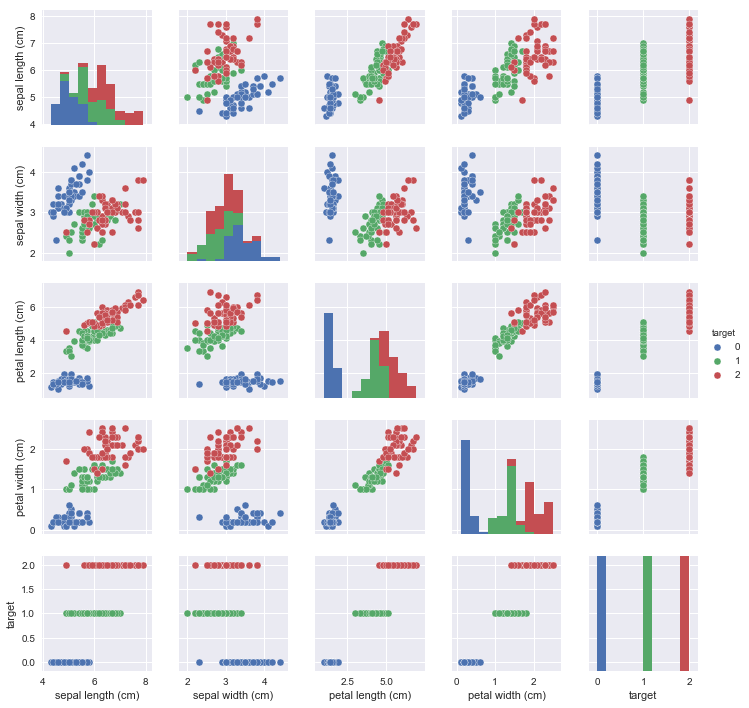

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(df,hue='target', size=2)

In [19]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

X = iris.data
Y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it - the X_pca is an object that stores the eigenvalues

lda = LDA(n_components=2)
X_lda = lda.fit(X,Y).transform(X) # fit data and transform - LDA needs Y variables for the labels,PCA does not require

# print the components

print ('pca:', pca.components_) # the underscore reserves the properties that are hidden until set like above
print ('lda:', lda.scalings_.T)

pca: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
lda: [[-0.81926852 -1.5478732   2.18494056  2.85385002]
 [ 0.03285975  2.15471106 -0.93024679  2.8060046 ]]


##### The above output represents the 2 eigenvector results from the PCA and LDA models

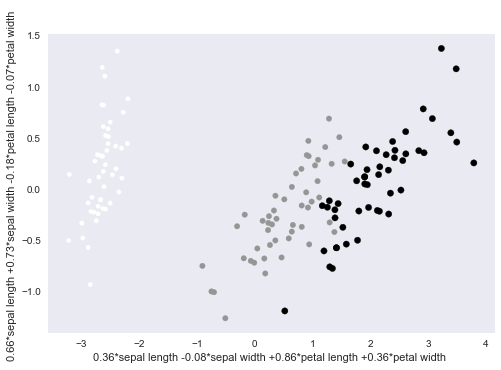

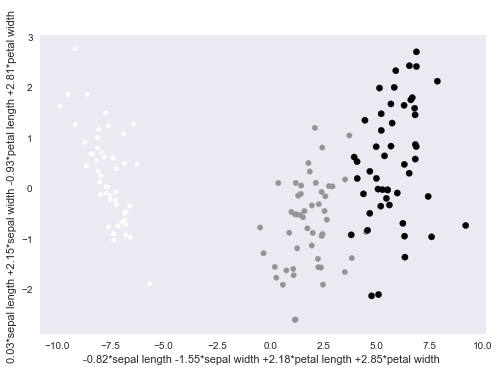

In [38]:
# this function definition formats the weights into readable strings
# you may skip withou loss of generality to the data science content

def get_feature_names_from_weights(weights,names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx, f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array

pca_weight_strings = get_feature_names_from_weights(pca.components_, iris.feature_names)
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, iris.feature_names)

# create pandas dataframes from transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])

from pandas.tools.plotting import scatter_plot

# scatter plot the ouput, with names from the weights
ax = scatter_plot(df_pca, pca_weight_strings[0], pca_weight_strings[1], c=y, s=(y+2)*10)
newfig = plt.figure()
ax = scatter_plot(df_lda, lda_weight_strings[0], lda_weight_strings[1], c=y, s=(y+2)*10)
plt.show()

##### The LDA and PCA outputs show a clear separation amongst the different Petals. One can easily classify and specify a threshold that will split o ut the different flower types.

# A MORE COMPLICATED DATASET - PEOPLE'S FACES

In [39]:
# FETCH DATASET
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [44]:
X = lfw_people.data # grab the image itself
Y = lfw_people.target # grab the name of the person associated with the image
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print('n_samples: {}'.format(n_samples))
print('n_features: {}'.format(n_features))
print('n_classes: {}'.format(n_classes))
print('Original Image Sizes {}by{}'.format(h,w))
print (50*37) # the size of the images are the size of the feature vectors

n_samples: 1288
n_features: 1850
n_classes: 7
Original Image Sizes 50by37
1850


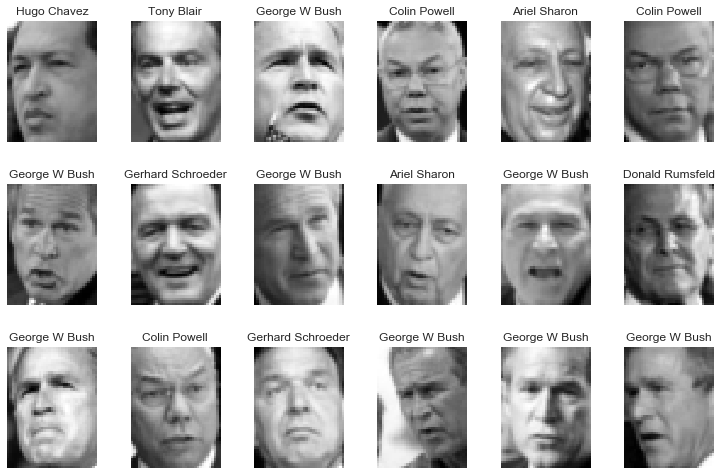

In [51]:
# FUNCTION THAT HELPS PLOT THE IMAGE
def plot_gallery(images,titles,h,w,n_row=3,n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right =.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names[Y], h, w) # defaults to showing 3 by 6 

In [55]:
# NOW REDUCE THE # OF DIMENSIONS FROM 1800 DOWN TO 300

from sklearn.decomposition import PCA

n_components = 300
print ("Extracting top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting top 300 eigenfaces from 1288 faces
Wall time: 654 ms


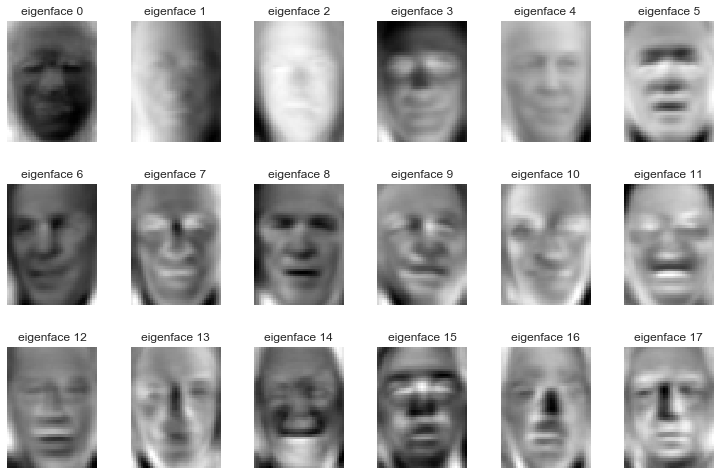

In [62]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)